In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('cat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def bilinear_interpolation(src, dst_size):
    src_h, src_w, channel = src.shape
    dst_w, dst_h = dst_size
    dst_x, dst_y = np.mgrid[:dst_h, :dst_w]
    x_scale = dst_w / src_w
    y_scale = dst_h / src_h
    
    src_x = (dst_x + 0.5) / x_scale - 0.5
    src_y = (dst_y + 0.5) / y_scale - 0.5
    
    src_x1 = (src_x).astype(np.int64)
    src_y1 = (src_y).astype(np.int64)
    
    src_x2 = src_x1 + 1
    src_y2 = src_y1 + 1
    
    src_x1 = np.clip(src_x1, 0, src_w - 1)
    src_y1 = np.clip(src_y1, 0, src_h - 1)
    src_x2 = np.clip(src_x2, 0, src_w - 1)
    src_y2 = np.clip(src_y2, 0, src_h - 1)
    y1_value = np.expand_dims((src_x - src_x1), axis=2) * src[src_y1, src_x2] + np.expand_dims((src_x2 - src_x), axis=2) * src[src_y1, src_x1]
    y2_value = np.expand_dims((src_x - src_x1), axis=2) * src[src_y2, src_x2] + np.expand_dims((src_x2 - src_x), axis=2) * src[src_y2, src_x1]
    dst = np.expand_dims((src_y - src_y1), axis=2) * y2_value + np.expand_dims((src_y2 - src_y), axis=2) * y1_value
    dst = np.swapaxes(dst, 0, 1).astype(np.int64)
    return dst

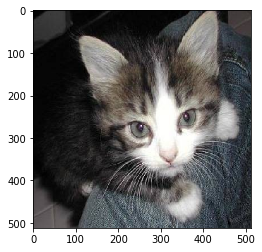

In [4]:
img_b = bilinear_interpolation(img, (512, 512))
plt.imshow(img_b)